In [ ]:
################Indian_liver disease Prediction######################

In [20]:
import numpy as np
import pandas as pd


df = pd.read_csv(r"C:\Users\sugan\Downloads\Mutiple disease pred-prj4\indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
print(df.columns.tolist())

['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


In [21]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object


In [22]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (583, 11)


In [5]:
print(df['Dataset'].value_counts(dropna=False))

Dataset
1    416
2    167
Name: count, dtype: int64


In [23]:
# Convert categorical gender safely
df['Gender'] = (
    df['Gender']
    .astype(str)                            # convert all to string
    .str.strip()                            # remove spaces
    .str.capitalize()                       # normalize case
    .map({'Male': 1, 'Female': 0})          # encode
    .fillna(0)                              # handle missing
    .astype(int)                            # ensure numeric type
)

In [ ]:
# # Convert categorical gender
# df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
# df['Gender'] = df['Gender'].fillna(0)

In [24]:
# Fill missing Albumin_and_Globulin_Ratio with median
df.fillna({'Albumin_and_Globulin_Ratio': df['Albumin_and_Globulin_Ratio'].median()}, inplace=True)

In [25]:
# ✅ Fix target encoding (1 = Liver Disease, 2 = Healthy → 0)
df['Dataset'] = df['Dataset'].replace({1: 1, 2: 0})
print("\nAfter renaming target:\n", df['Dataset'].value_counts())


After renaming target:
 Dataset
1    416
0    167
Name: count, dtype: int64


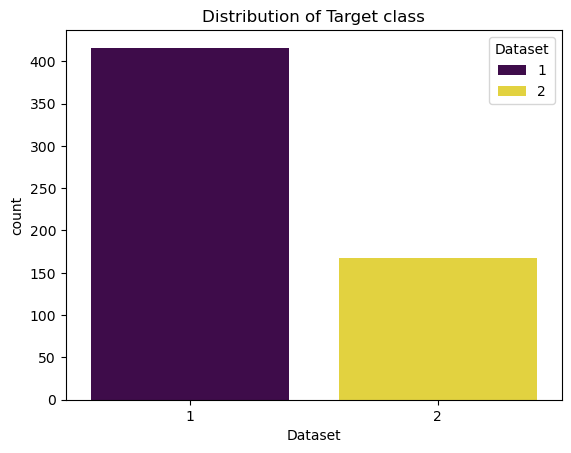

Dataset
1    0.713551
2    0.286449
Name: proportion, dtype: float64


In [14]:
#Target Variable distribution:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Dataset',hue='Dataset', data=df, palette='viridis')
plt.title("Distribution of Target class")
plt.show()

print(df['Dataset'].value_counts(normalize=True))

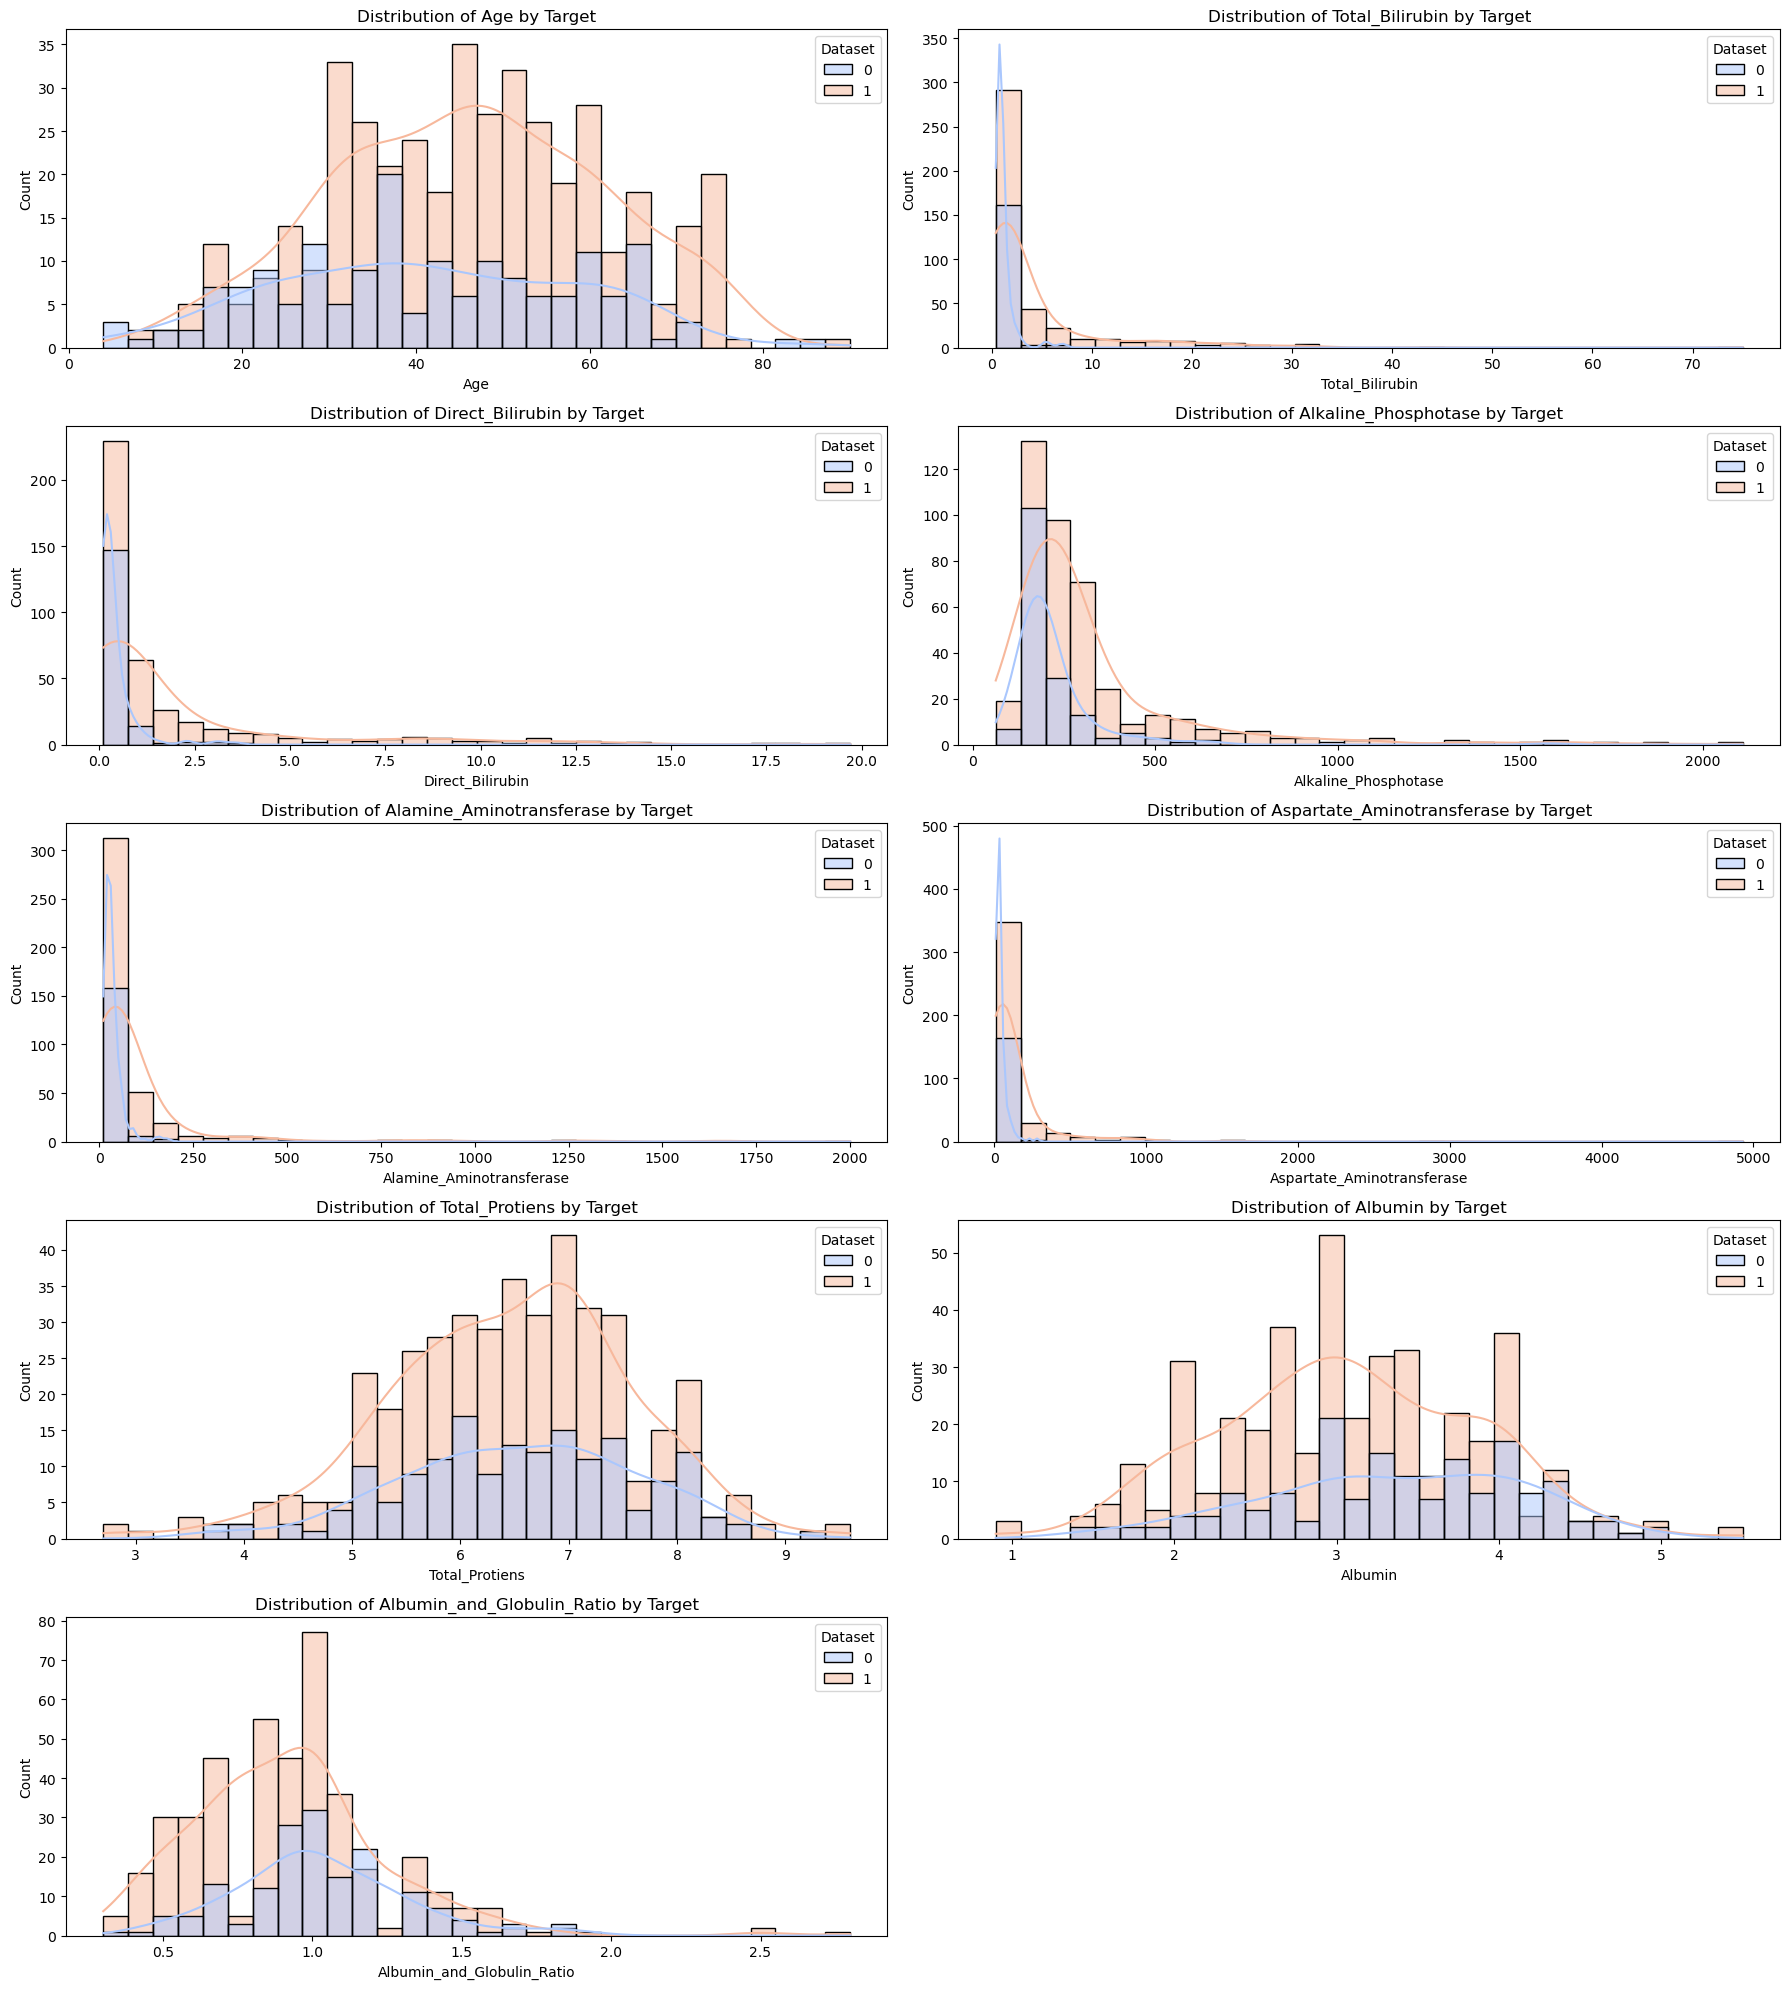

In [12]:
# Distribution of each feature vs Target
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
             'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
             'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

plt.figure(figsize=(18, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=col, hue='Dataset', kde=True, bins=30, palette='coolwarm')
    plt.title(f"Distribution of {col} by Target")
plt.tight_layout()
plt.show()


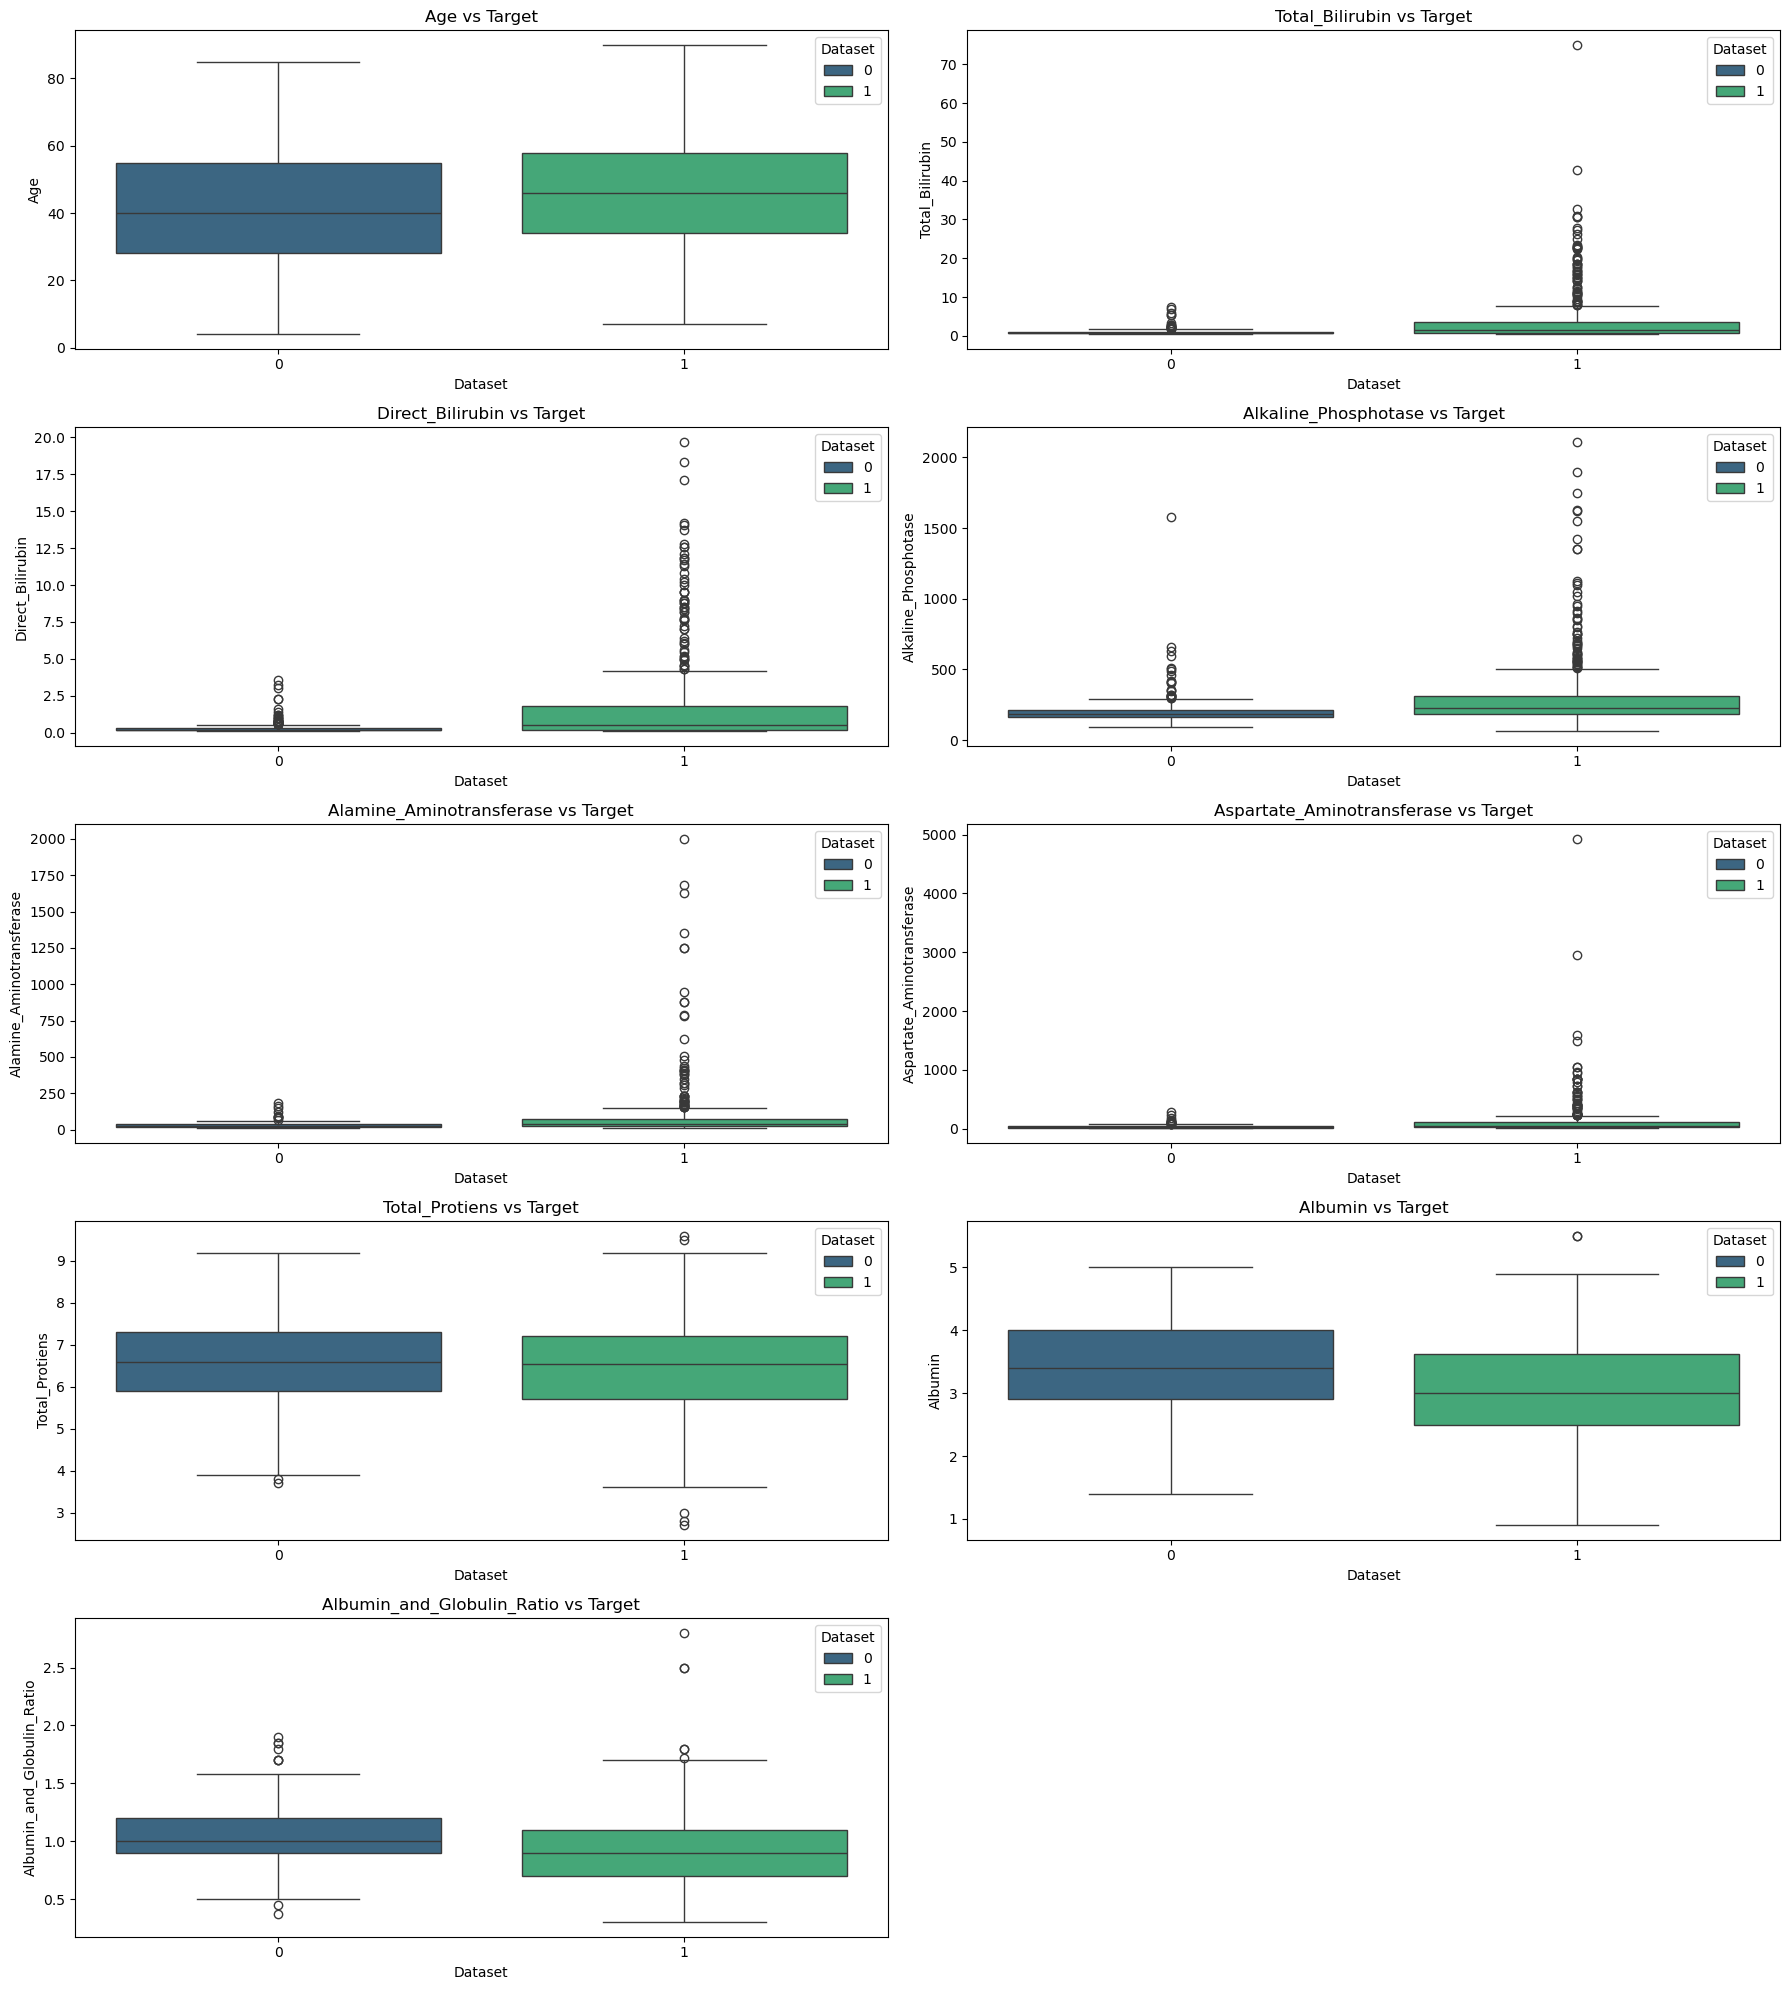

In [17]:
#Outlier Detection using Boxplot:

plt.figure(figsize=(18, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Dataset',hue='Dataset', y=col, data=df, palette='viridis')
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()


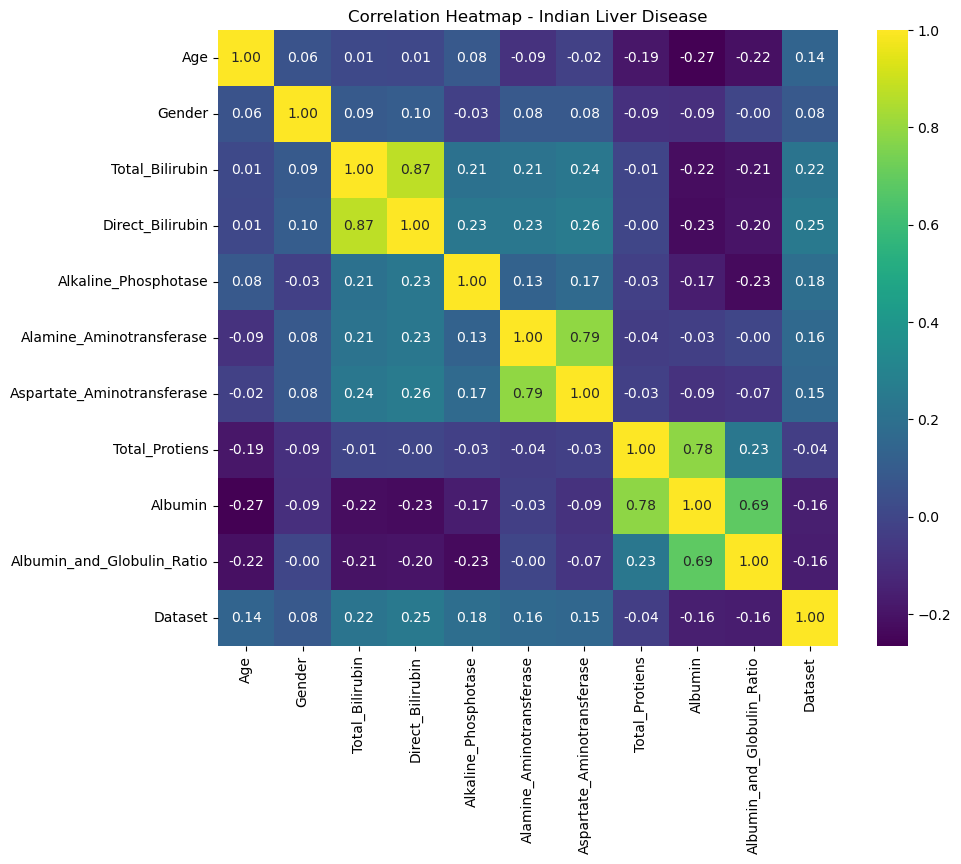

In [19]:
#Correlation Heatmap:

plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap - Indian Liver Disease")
plt.show()


In [12]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Sort correlations with target
target_corr = corr_matrix['Dataset'].sort_values(ascending=False)

# Top 10 correlated features
top_features = target_corr.drop('Dataset').head(10)
print("🔝 Top 10 features correlated with target:")
print(top_features)


🔝 Top 10 features correlated with target:
Direct_Bilirubin              0.246046
Total_Bilirubin               0.220208
Alkaline_Phosphotase          0.184866
Alamine_Aminotransferase      0.163416
Aspartate_Aminotransferase    0.151934
Age                           0.137351
Gender                        0.082416
Total_Protiens               -0.035008
Albumin                      -0.161388
Albumin_and_Globulin_Ratio   -0.162144
Name: Dataset, dtype: float64


In [15]:
num_cols = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
            'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
            'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

In [16]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

In [26]:
X = df.drop(columns=['Dataset'])
y = df['Dataset']

In [27]:
print("Non-numeric columns in X:", X.select_dtypes(exclude=[np.number]).columns.tolist())

Non-numeric columns in X: []


In [28]:
# Impute missing values with median (numeric)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [29]:
#Train-Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.25, random_state=42, stratify=y
)

In [31]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print(f"✅ After SMOTE: {np.bincount(y_train_res)}")

✅ After SMOTE: [312 312]


In [33]:
from sklearn.ensemble import RandomForestClassifier

base_model = RandomForestClassifier(
    n_estimators=600,
    max_depth=20,
    min_samples_split=4,
    min_samples_leaf=2,
    class_weight={0: 1, 1: 2},
    random_state=42
)

In [34]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_model = CalibratedClassifierCV(base_model, method='sigmoid', cv=5)
calibrated_model.fit(X_train_res, y_train_res)

CalibratedClassifierCV(cv=5,
                       estimator=RandomForestClassifier(class_weight={0: 1,
                                                                      1: 2},
                                                        max_depth=20,
                                                        min_samples_leaf=2,
                                                        min_samples_split=4,
                                                        n_estimators=600,
                                                        random_state=42))

In [35]:
y_prob = calibrated_model.predict_proba(X_test_scaled)[:, 1]

In [36]:
# Find best threshold (maximize F1)
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
)
best_thr, best_f1 = 0, 0
for thr in np.arange(0.05, 0.6, 0.05):
    preds = (y_prob >= thr).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1, best_thr = f1, thr

print(f"\n✅ Best Threshold based on F1: {best_thr:.2f} (F1={best_f1:.3f})")


✅ Best Threshold based on F1: 0.35 (F1=0.833)


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score, auc, roc_auc_score


# Final evaluation
y_pred = (y_prob >= best_thr).astype(int)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Healthy", "Liver Disease"]))
print(f"AUC: {roc_auc_score(y_test, y_prob):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


📊 Classification Report:
               precision    recall  f1-score   support

      Healthy       0.59      0.24      0.34        42
Liver Disease       0.75      0.93      0.83       104

     accuracy                           0.73       146
    macro avg       0.67      0.59      0.59       146
 weighted avg       0.70      0.73      0.69       146

AUC: 0.7736
Accuracy: 0.7329



Confusion Matrix:
 [[10 32]
 [ 7 97]]


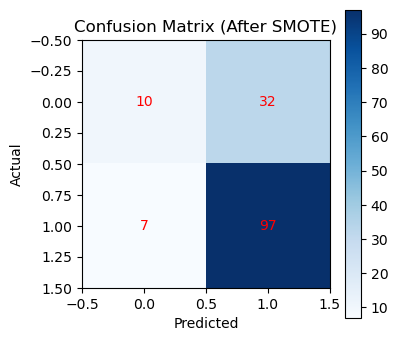

In [38]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (After SMOTE)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, f"{val}", ha="center", va="center", color="red")
plt.show()

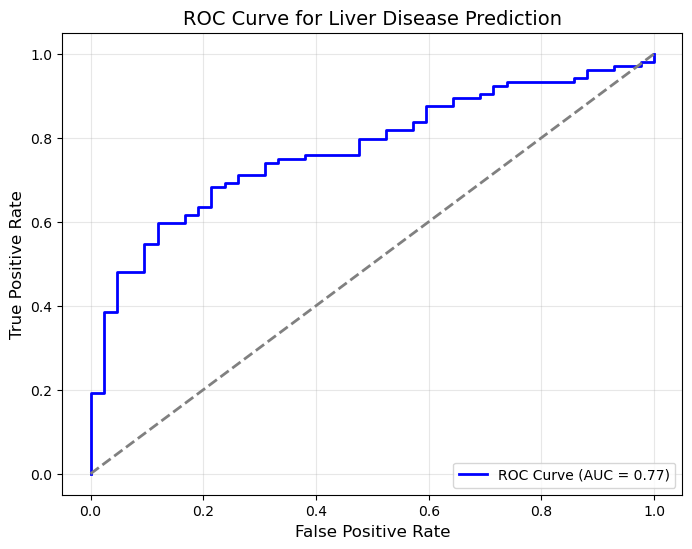

In [39]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Liver Disease Prediction', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [40]:
import pickle

with open("liver2_model.pkl", "wb") as model_file:
    pickle.dump(calibrated_model, model_file)

with open("liver2_scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)